# Message to the future

Many data loading scripts in this notebook were somewhat single-use, best to rewrite data loading from scratch in case you rerun the experiments.

The results were fetched and saved as csv files in `scripts/results/` directory. You can go straight to "Load data from disk" section if you want to load them. Should be enough to test or figure out how the actual plotting scripts work. 

# Requirements

In [1]:
from math import isnan

import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import wandb

dataset_match = {
    "fbirn_main_sex": "FBIRN Sex",
    "fbirn_main_sex_108": "FBIRN Sex test",
}

model_match = {
    "mlp": "meanMLP",
    "rearranged_mlp": "meanMLP",
    "attn_mlp": "Attention MLP",
    "lstm": "LSTM",
    "mean_lstm": "meanLSTM",
    "transformer": "Transformer w/o PE",
    "mean_transformer": "meanTransformer w/o PE",
    "pe_transformer": "Transformer",
    "mean_pe_transformer": "meanTransformer",
    "milc": "MILC",
    "dice": "DICE",
    "bnt": "BNT",
    "fbnetgen": "FBNetGen",
    "brainnetcnn": "BrainNetCNN",
    "lr": "LR",
    "bolT": "BolT",
    "glacier": "Glacier",
}


# Load data

## General results

In [2]:
datasets = [
    "fbirn_main_sex",
    "fbirn_main_sex_108"
]

dataset_suffix = "_th"
models = [
    "mlp",
    "lstm",
    "transformer",
    "mean_lstm",
    "mean_transformer",
    "milc",
    "dice",
    "bolT", 
    "glacier",
    "bnt",
    "fbnetgen",
    "brainnetcnn",
    "lr",
]

basepath = "/data/users2/ppopov1/mlp-project/assets/logs/"

projects = {}
for model in models:
    projects[model] = {}

    for dataset in datasets:
        if "108" in dataset:
            prefix = "_fbirn_sex_108"
        else:
            prefix = "_fbirn_sex"

        projects[model][dataset] = f"{basepath}{prefix}-exp-{model}_defHP-{dataset}/runs.csv"


results = []

for model in models:
    for dataset in datasets:
        file_path = projects[model][dataset]
        try:
            df = pd.read_csv(file_path)
            test_score = df['test_score'].values
            for score in test_score:
                results.append({
                    'Model': model_match[model],
                    'Dataset': dataset_match[dataset],
                    'ROC AUC': score
                })
        except FileNotFoundError:
            print(f"File not found: {file_path}")
        except pd.errors.EmptyDataError:
            print(f"Empty data in file: {file_path}")

results_df = pd.DataFrame(results)

File not found: /data/users2/ppopov1/mlp-project/assets/logs/_fbirn_sex_108-exp-fbnetgen_defHP-fbirn_main_sex_108/runs.csv
File not found: /data/users2/ppopov1/mlp-project/assets/logs/_fbirn_sex_108-exp-brainnetcnn_defHP-fbirn_main_sex_108/runs.csv
File not found: /data/users2/ppopov1/mlp-project/assets/logs/_fbirn_sex_108-exp-lr_defHP-fbirn_main_sex_108/runs.csv


# Plot data

In [5]:
models = [
    "meanMLP",
    'LSTM',
    'Transformer',
    'meanLSTM',
    'meanTransformer',
    "MILC", 
    "DICE", 
    "BolT",
    "Glacier",
    "BNT", 
    "FBNetGen", 
    "BrainNetCNN", 
    "LR"
]
datasets = [
    "FBIRN Sex",
    # "FBIRN Sex test",
]


hue_order = models
palette = { item: plt.cm.tab20(i) for i, item in enumerate(models)}

/tmp/ipykernel_1486379/1120347347.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(gs[0])


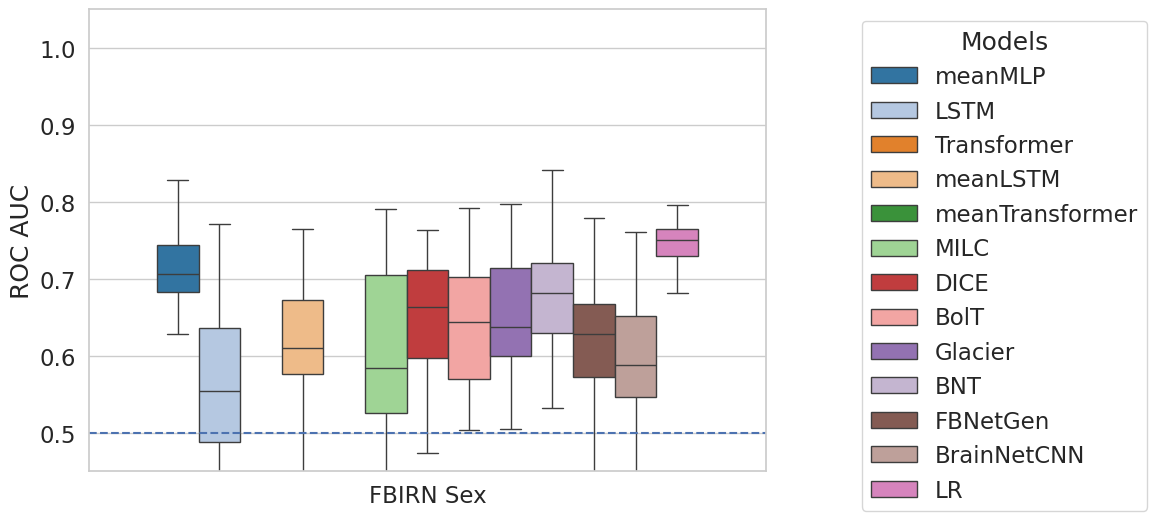

In [7]:
import matplotlib.ticker as ticker
from statannot import add_stat_annotation


import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

sns.reset_orig()
sns.set_theme(
    style="whitegrid", 
    font_scale = 1.5,
)

# Create a figure and a grid of subplots (2 rows, 1 column)
fig, ax = plt.subplots(figsize=(12, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1], hspace=0.3)

# Create a figure and a grid of subplots (2 rows, 1 column)
ax = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

## row 1
boxplot_1 = sns.boxplot(
    x="Dataset", 
    order=datasets,
    y="ROC AUC",
    hue="Model",
    hue_order=hue_order,
    data=results_df,
    palette=palette,
    showfliers = False,
    ax=ax,
)
ax.legend_.remove()
ax.axhline(y=0.5, linestyle='dashed')
ax.set_xlabel(None)
ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax.set_ylim(0.45, 1.05)
ax.set_ylabel("ROC AUC")


ax1.axis('off')  # Turn off axis for legend subplot
legend_handles, legend_labels = ax.get_legend_handles_labels()


# Create legends for each category and place them in subfig3
legend_ts = ax1.legend(handles=legend_handles, labels=legend_labels, title='Models', loc='upper left')

# # # Calculate the position for legend_fnc to the right of legend_ts
# legend_ts_bbox = legend_ts.get_bbox_to_anchor().transformed(subfig3.transAxes.inverted())
# legend_fnc = subfig3.legend(handles=fnc_handles, labels=fnc_labels, title='FNC Models', loc='upper left', bbox_to_anchor=(legend_ts_bbox.x0, legend_ts_bbox.y0+0.15))

# subfig3.add_artist(legend_ts)


# Show the plot
plt.show()
# plt.savefig(
#     "general_comparison.png",
#     format="png",
#     # dpi=300,
#     bbox_inches='tight',
# )
# plt.savefig(
#     "general_comparison.svg",
#     format="svg",
#     # dpi=300,
#     bbox_inches='tight',
# )
# plt.close()

In [ ]:
import scipy.io

# Load the .mat file
mat_file_path = '/data/users2/ppopov1/datasets/causal_networks/networks/Network1_amp/Amatrices.mat'
mat_contents = scipy.io.loadmat(mat_file_path)

print(mat_contents["aa"].shape)
# Inspect the contents
for key, value in mat_contents.items():
    if not key.startswith('__'):
        print(f"{key}: {value}")